**Practical Assignment 2 – Dependency parsing**

Implement a neural transition-based dependency parser based on feedforward networks to output the dependency syntactic structure (in CoNLLU format) of an input given sentence. For the transition-based algorithm we will use the arc-eager algorithm.

Code developed by Marcelo Ferrer and Aymen Merchaoui

# Imports and Declarations

In [1]:
# Installs conllu, a python library to parse Universal Dependencies https://pypi.org/project/conllu/
!pip install conllu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# List of constants

######### MODEL #########
# Lenght of each component of the sentences
MAX_LEN=7
# Maximun length of the sequences 
MAX_LEN_PRE = 128
# Maximun length of the char sequences 
CHAR_LEN_PRE = 18

######### TRAIN #########
# Amount of epochs to train
EPOCHS = 20
# Optimizer to use in the compilation of the model
OPTIMIZER = "Adam" #RMSProp, Nadam
# Size of the batch to use in the training
BATCH_SIZE = 64

######### DEBUG #########
# Print samples of the data and model
SHOW_SAMPLES = False
# Print non projective sentences
SHOW_NON_PROJECTIVE = False

######### EXECUTION #########
# Train the models again
TRAIN_MODELS = True
# Execute oracle test
ORACLE_TEST = True

######### PATHS #########
# Google drive folder path where the files are located
LOCAL_DRIVE_PATH = '/content/drive/MyDrive/P2 Final/'
# Urls of the dataset
URL_TRAIN = LOCAL_DRIVE_PATH + 'Dataset/en_partut-ud-train.conllu'
URL_TEST = LOCAL_DRIVE_PATH + 'Dataset/en_partut-ud-test.conllu'
URL_VAL = LOCAL_DRIVE_PATH + 'Dataset/en_partut-ud-dev.conllu'
# Urls of the new generated datasets
URL_TEST_CLEAN = LOCAL_DRIVE_PATH + 'Dataset/en_partut-ud-test_clean.conllu'
URL_TEST_BASIC = LOCAL_DRIVE_PATH + 'Dataset/en_partut-ud-basic.conllu'
URL_TEST_ADVANCED = LOCAL_DRIVE_PATH + 'Dataset/en_partut-ud-advanced.conllu'
URL_TEST_ADVANCED_P1 = LOCAL_DRIVE_PATH + 'Dataset/en_partut-ud-advanced-p1.conllu'
# Model locations
URL_BASIC_MODEL = LOCAL_DRIVE_PATH + 'Models/basic'
URL_ADVANCED_MODEL = LOCAL_DRIVE_PATH + 'Models/advanced'
URL_P1_MODEL = LOCAL_DRIVE_PATH + 'Models/p1'
# Image locations
URL_BASIC_IMG = LOCAL_DRIVE_PATH + 'Models/Images/basic.jpg'
URL_ADVANCED_IMG = LOCAL_DRIVE_PATH + 'Models/Images/advanced.jpg'
URL_P1_IMG = LOCAL_DRIVE_PATH + 'Models/Images/p1.jpg'

In [3]:
# Mount google drive to use the .py classes
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import the path in the drive where the py files are alocated
import sys

sys.path.append(LOCAL_DRIVE_PATH)

In [5]:
# Imports our python classes from the drive
from DataHandler import MyDataHandler
from ModelHandler import MyModelHandler
from DataHandler_P1 import MyDataHandler_P1

In [6]:
# Restart execution environment to reload changes done to python files before importing

# Data processing and Oracle simulation

In [7]:
# Create an instance of the data handler
dh = MyDataHandler(MAX_LEN)

In [8]:
# Gets the dataset of training
(train_ids, train_forms, train_heads, train_deprels, train_upos, train_valid_sentences, word_counts, upos_counts, action_counts, relation_counts) = dh.get_Procesed_Data(URL_TRAIN, False, SHOW_SAMPLES, False)
# Use the oracle to generate the training set and the dependecies tree
(oracletraining, dependenciestree,_) = dh.get_Oracle(train_ids, train_forms, train_heads, train_deprels, train_upos, train_valid_sentences, True, SHOW_SAMPLES, SHOW_NON_PROJECTIVE)
# Gets the training encoded sets
(train_stack, train_buffer, train_stack_upos, train_buffer_upos, train_actions, train_relations) = dh.get_Training(oracletraining, SHOW_SAMPLES)

In [9]:
# Gets the dataset of validation
(val_ids, val_forms, val_heads, val_deprels, val_upos, val_valid_sentences, word_counts, upos_counts, action_counts, relation_counts) = dh.get_Procesed_Data(URL_VAL, True, SHOW_SAMPLES, False)
(oracletraining, dependenciestree,_) = dh.get_Oracle(val_ids, val_forms, val_heads, val_deprels, val_upos, val_valid_sentences, True, SHOW_SAMPLES, SHOW_NON_PROJECTIVE)
(val_stack, val_buffer, val_stack_upos, val_buffer_upos, val_actions, val_relations) = dh.get_Training(oracletraining, SHOW_SAMPLES)

In [10]:
# Gets the dataset of testing
(test_ids, test_forms, test_heads, test_deprels, test_upos, test_valid_sentences, word_counts, upos_counts, action_counts, relation_counts) = dh.get_Procesed_Data(URL_TEST, True, SHOW_SAMPLES, True)
# Use the oracle to generate the dataset, dependencie tree and the projective sentences
(oracletraining, dependenciestree, valid_np_sentences) = dh.get_Oracle(test_ids, test_forms, test_heads, test_deprels, test_upos, test_valid_sentences, True, SHOW_SAMPLES, True, True, URL_TEST_CLEAN)
(test_stack, test_buffer, test_stack_upos, test_buffer_upos, test_actions, test_relations) = dh.get_Training(oracletraining, SHOW_SAMPLES)

Replacing in : TokenList<If, you, don't, do, not, see, the, button, ,, you, can't, can, not, subscribe, ., metadata={sent_id: "en_partut-ud-557", text: "If you don't see the button, you can't subscribe."}>
Replacing in : TokenList<If, you, don't, do, not, see, the, button, ,, you, can't, can, not, subscribe, ., metadata={sent_id: "en_partut-ud-557", text: "If you don't see the button, you can't subscribe."}>
Replacing in : TokenList<If, momma, ain't, is, not, happy, ,, nobody, ain't, is, not, happy, ., metadata={sent_id: "en_partut-ud-812", text: "If momma ain't happy, nobody ain't happy."}>
Replacing in : TokenList<If, momma, ain't, is, not, happy, ,, nobody, ain't, is, not, happy, ., metadata={sent_id: "en_partut-ud-812", text: "If momma ain't happy, nobody ain't happy."}>
Sentence is not proyective:  ['Needless', 'to', 'say', ',', 'safety', 'on', 'roads', ',', 'railways', 'and', 'inland', 'waterways', 'is', 'of', 'key', 'importance', 'and', ',', 'given', 'the', 'international', 'nat

In [11]:
# Create an instance of the data handler for the P1 model
dh_p1 = MyDataHandler_P1(MAX_LEN_PRE, CHAR_LEN_PRE)

# Gets the dataset of training, evaluation and generation of labels.
(train_inputs_P1, word_counts_P1, train_char_inputs_P1, char_counts_P1, train_outputs_P1, tag_counts_P1) = dh_p1.get_char_Procesed_Data(train_forms, train_upos, False, SHOW_SAMPLES)
(test_inputs_P1, test_word_counts_P1, test_char_inputs_P1, test_char_counts_P1, test_outputs_P1, test_tag_counts_P1) = dh_p1.get_char_Procesed_Data(test_forms, test_upos, True, SHOW_SAMPLES)
(val_inputs_P1, val_word_counts_P1, val_char_inputs_P1, val_char_counts_P1, val_outputs_P1, val_tag_counts_P1) = dh_p1.get_char_Procesed_Data(val_forms, val_upos, True, SHOW_SAMPLES)

In [12]:
# Imports all the necesary spacenames
import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Embedding
from keras.callbacks import EarlyStopping

In [13]:
# Convert to tensors so we could pass to the keras models
train_actionst=tf.convert_to_tensor(train_actions)
train_relationst=tf.convert_to_tensor(train_relations)
train_stackt=tf.convert_to_tensor(train_stack)
train_buffert=tf.convert_to_tensor(train_buffer)
train_stack_upost=tf.convert_to_tensor(train_stack_upos)
train_buffer_upost=tf.convert_to_tensor(train_buffer_upos)

val_actionst=tf.convert_to_tensor(val_actions)
val_relationst=tf.convert_to_tensor(val_relations)
val_stackt=tf.convert_to_tensor(val_stack)
val_buffert=tf.convert_to_tensor(val_buffer)
val_stack_upost=tf.convert_to_tensor(val_stack_upos)
val_buffer_upost=tf.convert_to_tensor(val_buffer_upos)

test_actionst=tf.convert_to_tensor(test_actions)
test_relationst=tf.convert_to_tensor(test_relations)
test_stackt=tf.convert_to_tensor(test_stack)
test_buffert=tf.convert_to_tensor(test_buffer)
test_stack_upost=tf.convert_to_tensor(test_stack_upos)
test_buffer_upost=tf.convert_to_tensor(test_buffer_upos)

train_inputs_P1t=tf.convert_to_tensor(train_inputs_P1)
train_char_inputs_P1t=tf.convert_to_tensor(train_char_inputs_P1)
train_outputs_P1t=tf.convert_to_tensor(train_outputs_P1)
test_inputs_P1t=tf.convert_to_tensor(test_inputs_P1)
test_char_inputs_P1t=tf.convert_to_tensor(test_char_inputs_P1)
test_outputs_P1t=tf.convert_to_tensor(test_outputs_P1)
val_inputs_P1t=tf.convert_to_tensor(val_inputs_P1)
val_char_inputs_P1t=tf.convert_to_tensor(val_char_inputs_P1)
val_outputs_P1t=tf.convert_to_tensor(val_outputs_P1)

# Model training and oracle test

In [14]:
# Create an instance of the data handler
mh = MyModelHandler(MAX_LEN, MAX_LEN_PRE, CHAR_LEN_PRE, word_counts, upos_counts, action_counts, relation_counts, tag_counts_P1)

Basic model (use only words to predict)

In [15]:
# Get the basic model (only words)
if TRAIN_MODELS:
  # Get a new model and train it
  model_basic = mh.get_model("Basic")
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience=3)
  model_basic.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
  history_basic = model_basic.fit(x=[train_stackt,train_buffert], y=[train_actionst, train_relationst], validation_data=([val_stackt, val_buffert], [val_actionst, val_relationst]), epochs=10 ,batch_size=64, callbacks=es)
  #Evaluate accuracy against the test data
  history_basic_test = model_basic.evaluate([test_stackt,test_buffert], [test_actionst, test_relationst])
  # Save the model to disk to use later
  model_basic.save(URL_BASIC_MODEL)
else:
  # Get the model from disk
  model_basic = keras.models.load_model(URL_BASIC_MODEL)

Epoch 1/10
1269/1269 [==============================] - 10s 6ms/step - loss: 2.6412 - dense_loss: 0.8873 - dense_1_loss: 1.7539 - dense_accuracy: 0.6165 - dense_1_accuracy: 0.5471 - val_loss: 2.2072 - val_dense_loss: 0.7641 - val_dense_1_loss: 1.4431 - val_dense_accuracy: 0.7031 - val_dense_1_accuracy: 0.5868
Epoch 2/10
1269/1269 [==============================] - 7s 5ms/step - loss: 1.8172 - dense_loss: 0.5792 - dense_1_loss: 1.2380 - dense_accuracy: 0.7672 - dense_1_accuracy: 0.6419 - val_loss: 2.0369 - val_dense_loss: 0.7401 - val_dense_1_loss: 1.2968 - val_dense_accuracy: 0.7228 - val_dense_1_accuracy: 0.6231
Epoch 3/10
1269/1269 [==============================] - 7s 5ms/step - loss: 1.5517 - dense_loss: 0.4938 - dense_1_loss: 1.0579 - dense_accuracy: 0.8064 - dense_1_accuracy: 0.6852 - val_loss: 1.9664 - val_dense_loss: 0.7594 - val_dense_1_loss: 1.2070 - val_dense_accuracy: 0.7322 - val_dense_1_accuracy: 0.6468
Epoch 4/10
1269/1269 [==============================] - 7s 5ms/step -

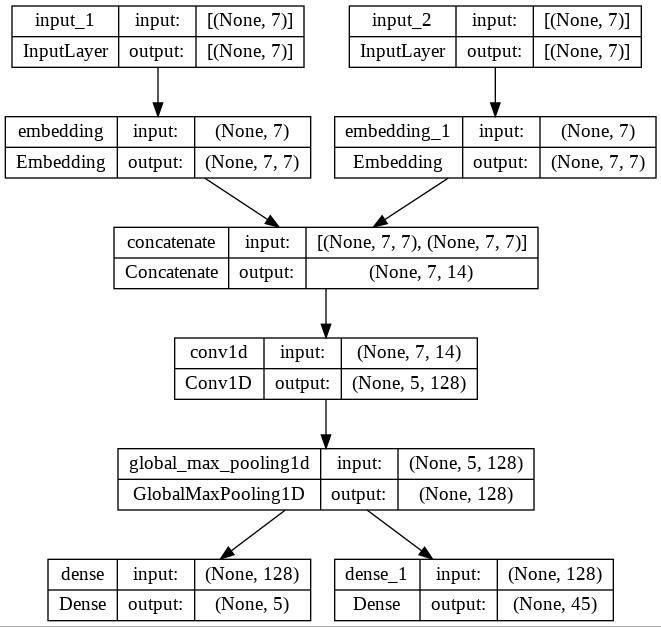

In [16]:
# Show the model structure
tf.keras.utils.plot_model(model_basic, to_file=URL_BASIC_IMG, show_shapes=True)

In [17]:
# Generate the testing file of the model
if ORACLE_TEST:
  new_dependencies_basic = dh.get_Real_Oracle(valid_np_sentences, SHOW_SAMPLES, model_basic,URL_TEST_BASIC)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 20ms/step


Advance model (use words and upos to predict)

In [18]:
# Get the advance model
if TRAIN_MODELS:
  # Create a new advance model from scratch and train it
  model_advanced = mh.get_model("Advanced")
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience=3)
  model_advanced.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
  history_advanced = model_advanced.fit(x=[train_stackt,train_buffert,train_stack_upost,train_buffer_upost] ,y=[train_actionst,train_relationst], epochs=20 ,batch_size=64,validation_data=([val_stackt,val_buffert,val_stack_upost,val_buffer_upost], [val_actionst, val_relationst]),callbacks=es)
  history_advanced_test = model_advanced.evaluate([test_stackt,test_buffert,test_stack_upost,test_buffer_upost], [test_actionst, test_relationst])
  # Save the model to disk to use later
  model_advanced.save(URL_ADVANCED_MODEL)
else:
  # Load the model from disk
  model_advanced = keras.models.load_model(URL_ADVANCED_MODEL)

Epoch 1/20
1269/1269 [==============================] - 13s 9ms/step - loss: 2.1970 - dense_2_loss: 0.7586 - dense_3_loss: 1.4384 - dense_2_accuracy: 0.6888 - dense_3_accuracy: 0.6367 - val_loss: 1.4079 - val_dense_2_loss: 0.5135 - val_dense_3_loss: 0.8944 - val_dense_2_accuracy: 0.8084 - val_dense_3_accuracy: 0.7563
Epoch 2/20
1269/1269 [==============================] - 10s 8ms/step - loss: 1.2877 - dense_2_loss: 0.4895 - dense_3_loss: 0.7981 - dense_2_accuracy: 0.8110 - dense_3_accuracy: 0.7758 - val_loss: 1.2024 - val_dense_2_loss: 0.4709 - val_dense_3_loss: 0.7314 - val_dense_2_accuracy: 0.8136 - val_dense_3_accuracy: 0.7889
Epoch 3/20
1269/1269 [==============================] - 8s 6ms/step - loss: 1.1478 - dense_2_loss: 0.4475 - dense_3_loss: 0.7003 - dense_2_accuracy: 0.8300 - dense_3_accuracy: 0.7931 - val_loss: 1.1158 - val_dense_2_loss: 0.4364 - val_dense_3_loss: 0.6794 - val_dense_2_accuracy: 0.8357 - val_dense_3_accuracy: 0.7993
Epoch 4/20
1269/1269 [======================

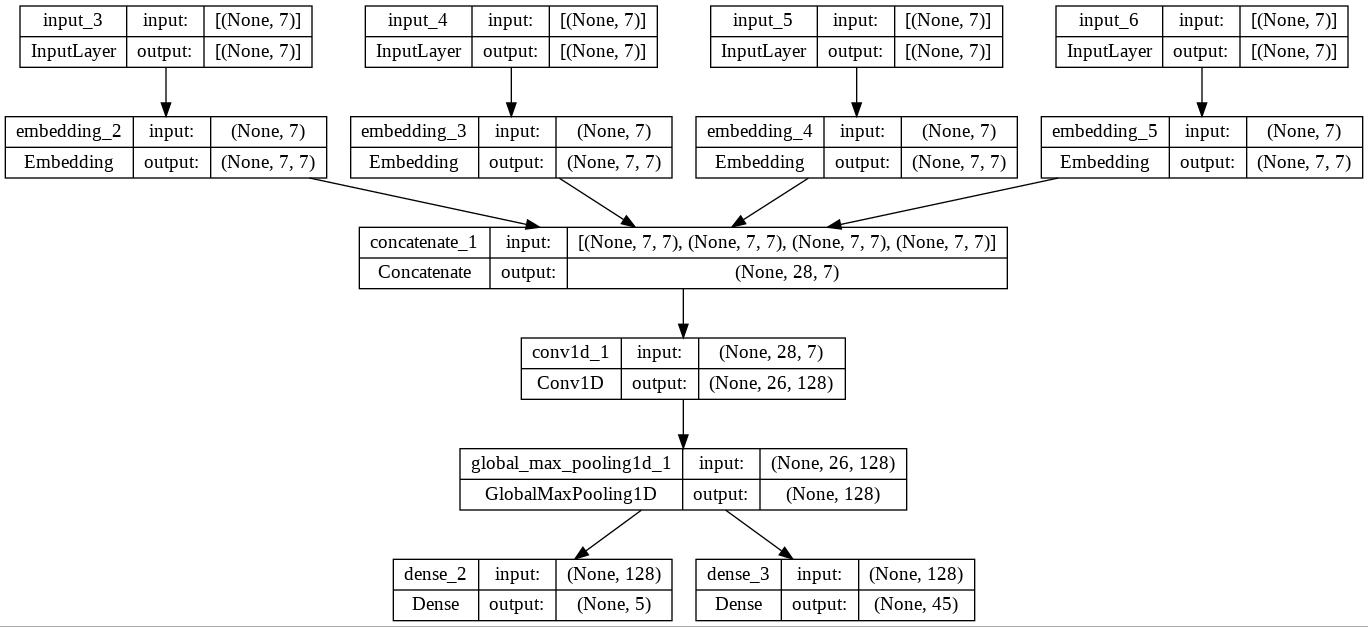

In [19]:
# Show the structure of the advance model
tf.keras.utils.plot_model(model_advanced, to_file=URL_ADVANCED_IMG, show_shapes=True, show_layer_names=True)

In [20]:
# Generate the testing file
if ORACLE_TEST:
  new_dependencies_advanced = dh.get_Real_Oracle(valid_np_sentences, SHOW_SAMPLES, model_advanced,URL_TEST_ADVANCED, True)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 30ms/step


Prediction model (use advance model with P1 model to predict the upos)

In [21]:
# Get the upos P1 prediction model
if TRAIN_MODELS:
  # Generate a new model from scratch and train it
  model_advanced_pre = mh.get_model("Advanced_Pre")
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience=3)
  model_advanced_pre.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
  history_advanced_pre =model_advanced_pre.fit(x=[train_inputs_P1t,train_char_inputs_P1t] ,y=train_outputs_P1t, validation_data=([val_inputs_P1t,val_char_inputs_P1t], val_outputs_P1t),epochs=20 ,batch_size=64,callbacks=es)
  history_advanced_pre_test = model_advanced_pre.evaluate([test_inputs_P1t,test_char_inputs_P1t], [test_outputs_P1t])
  # Save the model to disk to use later
  model_advanced_pre.save(URL_P1_MODEL)
else:
  # Load model from disk
  model_advanced_pre = keras.models.load_model(URL_P1_MODEL)

Epoch 1/20
28/28 [==============================] - 24s 364ms/step - loss: 0.4730 - accuracy: 0.2403 - val_loss: 0.2906 - val_accuracy: 0.3979
Epoch 2/20
28/28 [==============================] - 6s 198ms/step - loss: 0.3232 - accuracy: 0.4954 - val_loss: 0.1834 - val_accuracy: 0.5977
Epoch 3/20
28/28 [==============================] - 6s 199ms/step - loss: 0.1964 - accuracy: 0.6908 - val_loss: 0.1147 - val_accuracy: 0.7531
Epoch 4/20
28/28 [==============================] - 6s 202ms/step - loss: 0.1134 - accuracy: 0.8358 - val_loss: 0.0788 - val_accuracy: 0.8413
Epoch 5/20
28/28 [==============================] - 6s 200ms/step - loss: 0.0647 - accuracy: 0.9179 - val_loss: 0.0566 - val_accuracy: 0.8751
Epoch 6/20
28/28 [==============================] - 6s 202ms/step - loss: 0.0399 - accuracy: 0.9521 - val_loss: 0.0487 - val_accuracy: 0.8909
Epoch 7/20
28/28 [==============================] - 6s 202ms/step - loss: 0.0286 - accuracy: 0.9638 - val_loss: 0.0450 - val_accuracy: 0.8898
Epoch

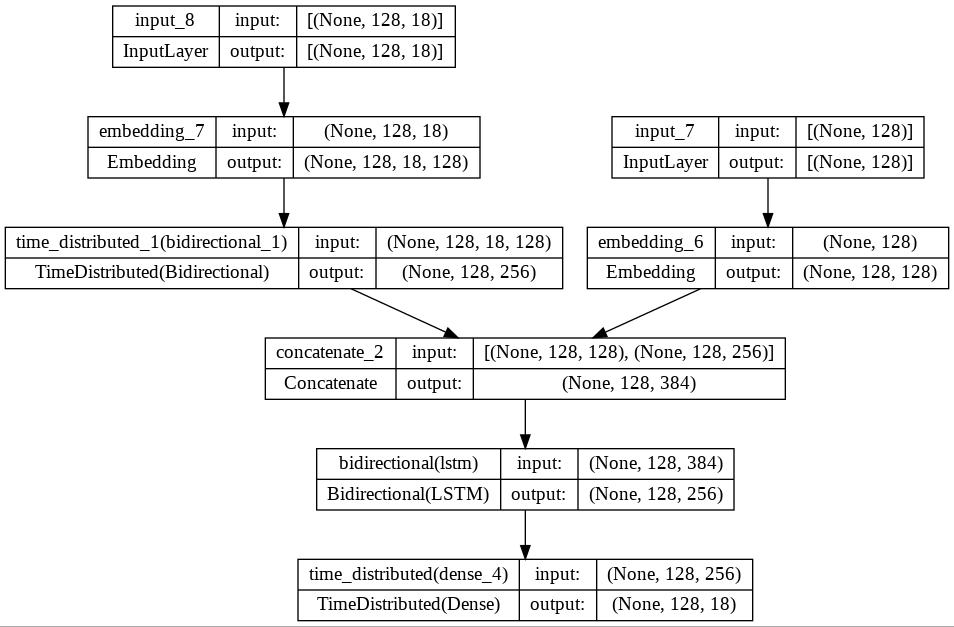

In [22]:
# Show the structure of the model
tf.keras.utils.plot_model(model_advanced_pre, to_file=URL_P1_IMG, show_shapes=True, show_layer_names=True)

In [23]:
# Generate the file for testing this aproach
if ORACLE_TEST:
  new_dependencies_advanced_pre = dh.get_Real_Oracle(valid_np_sentences, SHOW_SAMPLES, model_advanced,URL_TEST_ADVANCED_P1, True, model_advanced_pre, dh_p1)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 27ms/step


# Results and predictions

In [24]:
print("Results for the basic word model:")
!python3 /content/drive/MyDrive/P2/conll18_ud_eval.py /content/drive/MyDrive/P2/Dataset/en_partut-ud-test_clean.conllu /content/drive/MyDrive/P2/Dataset/en_partut-ud-basic.conllu -v

Results for the basic word model:
Metric     | Precision |    Recall |  F1 Score | AligndAcc
-----------+-----------+-----------+-----------+-----------
Tokens     |    100.00 |    100.00 |    100.00 |
Sentences  |    100.00 |    100.00 |    100.00 |
Words      |    100.00 |    100.00 |    100.00 |
UPOS       |    100.00 |    100.00 |    100.00 |    100.00
XPOS       |    100.00 |    100.00 |    100.00 |    100.00
UFeats     |    100.00 |    100.00 |    100.00 |    100.00
AllTags    |    100.00 |    100.00 |    100.00 |    100.00
Lemmas     |    100.00 |    100.00 |    100.00 |    100.00
UAS        |     52.61 |     52.61 |     52.61 |     52.61
LAS        |     29.33 |     29.33 |     29.33 |     29.33
CLAS       |     21.46 |     17.11 |     19.04 |     17.11
MLAS       |     18.53 |     14.77 |     16.44 |     14.77
BLEX       |     21.46 |     17.11 |     19.04 |     17.11


In [25]:
print("Results for the advance word and upos model using current upos:")
!python3 /content/drive/MyDrive/P2/conll18_ud_eval.py /content/drive/MyDrive/P2/Dataset/en_partut-ud-test_clean.conllu /content/drive/MyDrive/P2/Dataset/en_partut-ud-advanced.conllu -v

Results for the advance word and upos model using current upos:
Metric     | Precision |    Recall |  F1 Score | AligndAcc
-----------+-----------+-----------+-----------+-----------
Tokens     |    100.00 |    100.00 |    100.00 |
Sentences  |    100.00 |    100.00 |    100.00 |
Words      |    100.00 |    100.00 |    100.00 |
UPOS       |    100.00 |    100.00 |    100.00 |    100.00
XPOS       |    100.00 |    100.00 |    100.00 |    100.00
UFeats     |    100.00 |    100.00 |    100.00 |    100.00
AllTags    |    100.00 |    100.00 |    100.00 |    100.00
Lemmas     |    100.00 |    100.00 |    100.00 |    100.00
UAS        |     70.19 |     70.19 |     70.19 |     70.19
LAS        |     57.24 |     57.24 |     57.24 |     57.24
CLAS       |     49.51 |     43.58 |     46.36 |     43.58
MLAS       |     45.76 |     40.27 |     42.84 |     40.27
BLEX       |     49.51 |     43.58 |     46.36 |     43.58


In [26]:
print("Results for the advance word and upos model using predicted upos:")
!python3 /content/drive/MyDrive/P2/conll18_ud_eval.py /content/drive/MyDrive/P2/Dataset/en_partut-ud-test_clean.conllu /content/drive/MyDrive/P2/Dataset/en_partut-ud-advanced-p1.conllu -v

Results for the advance word and upos model using predicted upos:
Metric     | Precision |    Recall |  F1 Score | AligndAcc
-----------+-----------+-----------+-----------+-----------
Tokens     |    100.00 |    100.00 |    100.00 |
Sentences  |    100.00 |    100.00 |    100.00 |
Words      |    100.00 |    100.00 |    100.00 |
UPOS       |     87.08 |     87.08 |     87.08 |     87.08
XPOS       |    100.00 |    100.00 |    100.00 |    100.00
UFeats     |    100.00 |    100.00 |    100.00 |    100.00
AllTags    |     87.08 |     87.08 |     87.08 |     87.08
Lemmas     |    100.00 |    100.00 |    100.00 |    100.00
UAS        |     59.92 |     59.92 |     59.92 |     59.92
LAS        |     43.96 |     43.96 |     43.96 |     43.96
CLAS       |     34.70 |     28.98 |     31.58 |     28.98
MLAS       |     30.53 |     25.50 |     27.79 |     25.50
BLEX       |     34.70 |     28.98 |     31.58 |     28.98


In [27]:
# Show a comparision between the dependencies trees generate by each model
if ORACLE_TEST:
  print("Dependency tree example comparition")
  print("Original:",dependenciestree[0])
  print("Basic model:",new_dependencies_basic[0])
  print("Advanced model:",new_dependencies_advanced[0])
  print("Predictive model:",new_dependencies_advanced_pre[0])

Dependency tree example comparition
Original: [('root', 'root', 'Attribution'), ('Attribution', 'punct', '-'), ('Attribution', 'flat', 'ShareAlike'), ('ShareAlike', 'nummod', '2.0'), ('Attribution', 'punct', '.')]
Basic model: [('root', 'none', 'Attribution'), ('Attribution', 'punct', '-'), ('Attribution', 'obl', 'ShareAlike'), ('Attribution', 'obl', '2.0'), ('Attribution', 'punct', '.')]
Advanced model: [('root', 'root', 'Attribution'), ('Attribution', 'punct', '-'), ('Attribution', 'nmod', 'ShareAlike'), ('ShareAlike', 'flat', '2.0'), ('Attribution', 'punct', '.')]
Predictive model: [('root', 'root', 'Attribution'), ('Attribution', 'punct', '-'), ('Attribution', 'flat', 'ShareAlike'), ('ShareAlike', 'flat', '2.0'), ('Attribution', 'punct', '.')]


**Function to predict new sentences**

In [28]:
# List of setences to predict
sentences=["Reach your target customer.","Google is a nice search engine.", "Mary has a cat", "Spiderman exists", "I am real"]

# Predict the sentences and get the dependencies
new_dependencies = dh.get_Predictions(sentences, SHOW_SAMPLES, model_advanced, model_advanced_pre, dh_p1)

# Show the predicted dependecy trees
for x in new_dependencies:
  print(x)

# Results can be check against an online dependency parser like https://corenlp.run/

1/1 [==============================] - 0s 47ms/step
[('Root', 'root', 'Reach'), ('customer', 'nmod', 'target'), ('customer', 'nmod', 'your'), ('Reach', 'obl', 'customer'), ('Reach', 'punct', '.')]
[('search', 'amod', 'nice'), ('engine', 'nmod', 'search'), ('engine', 'det', 'a'), ('engine', 'cop', 'is'), ('Google', 'conj', 'engine'), ('Google', 'punct', '.'), ('ROOT', 'root', 'Google')]
[('cat', 'det', 'a'), ('cat', 'none', 'has'), ('Mary', 'none', 'cat'), ('ROOT', 'root', 'Mary')]
[('Root', 'root', 'Spiderman'), ('Spiderman', 'none', 'exists')]
[('real', 'none', 'am'), ('real', 'nsubj', 'I'), ('Root', 'root', 'real')]


# Conclusions

In [29]:
# Import matlab for ploting
import matplotlib.pyplot as plt

In [30]:
list(history_basic.history)

['loss',
 'dense_loss',
 'dense_1_loss',
 'dense_accuracy',
 'dense_1_accuracy',
 'val_loss',
 'val_dense_loss',
 'val_dense_1_loss',
 'val_dense_accuracy',
 'val_dense_1_accuracy']

Basic Model: use only words as input
Advance Model: use words and upos as input


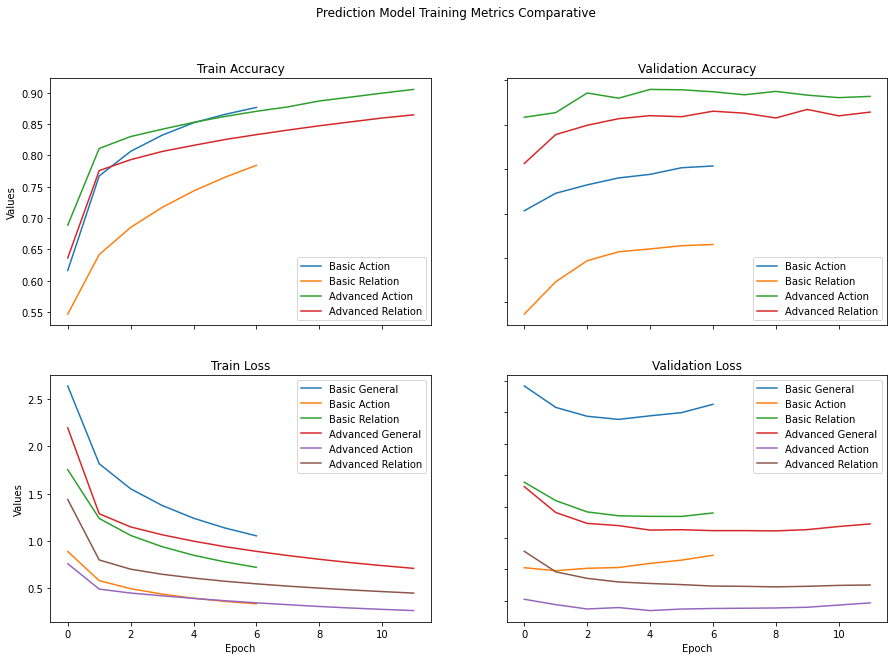

In [31]:
# Plot the training and validation model metrics
if TRAIN_MODELS:
  print("Basic Model: use only words as input")
  print("Advance Model: use words and upos as input")
  plt.rcParams["figure.figsize"] = (15,10)

  # summarize history for train accuracy
  fig, axs = plt.subplots(2,2)
  fig.suptitle('Prediction Model Training Metrics Comparative')
  axs[0,0].plot(history_basic.history[list(history_basic.history)[3]])
  axs[0,0].plot(history_basic.history[list(history_basic.history)[4]])
  axs[0,0].plot(history_advanced.history[list(history_advanced.history)[3]])
  axs[0,0].plot(history_advanced.history[list(history_advanced.history)[4]])
  axs[0,0].set_title("Train Accuracy")
  axs[0,0].legend(['Basic Action', 'Basic Relation', 'Advanced Action', 'Advanced Relation'], loc='lower right')
  # summarize history for validation accuracy
  axs[0,1].plot(history_basic.history[list(history_basic.history)[8]])
  axs[0,1].plot(history_basic.history[list(history_basic.history)[9]])
  axs[0,1].plot(history_advanced.history[list(history_advanced.history)[8]])
  axs[0,1].plot(history_advanced.history[list(history_advanced.history)[9]])
  axs[0,1].set_title("Validation Accuracy")
  axs[0,1].legend(['Basic Action', 'Basic Relation', 'Advanced Action', 'Advanced Relation'], loc='lower right')
  # summarize history for train loss
  axs[1,0].plot(history_basic.history[list(history_basic.history)[0]])
  axs[1,0].plot(history_basic.history[list(history_basic.history)[1]])
  axs[1,0].plot(history_basic.history[list(history_basic.history)[2]])
  axs[1,0].plot(history_advanced.history[list(history_advanced.history)[0]])
  axs[1,0].plot(history_advanced.history[list(history_advanced.history)[1]])
  axs[1,0].plot(history_advanced.history[list(history_advanced.history)[2]])
  axs[1,0].set_title("Train Loss")
  axs[1,0].legend(['Basic General', 'Basic Action', 'Basic Relation','Advanced General', 'Advanced Action', 'Advanced Relation'], loc='upper right')
  # summarize history for validation loss
  axs[1,1].plot(history_basic.history[list(history_basic.history)[5]])
  axs[1,1].plot(history_basic.history[list(history_basic.history)[6]])
  axs[1,1].plot(history_basic.history[list(history_basic.history)[7]])
  axs[1,1].plot(history_advanced.history[list(history_advanced.history)[5]])
  axs[1,1].plot(history_advanced.history[list(history_advanced.history)[6]])
  axs[1,1].plot(history_advanced.history[list(history_advanced.history)[7]])
  axs[1,1].set_title("Validation Loss")
  axs[1,1].legend(['Basic General', 'Basic Action', 'Basic Relation','Advanced General', 'Advanced Action', 'Advanced Relation'], loc='upper right')


  for ax in axs.flat:
      ax.set(xlabel='Epoch', ylabel='Values')

  # Hide x labels and tick labels for top plots and y ticks for right plots.
  for ax in axs.flat:
      ax.label_outer()

  plt.show()

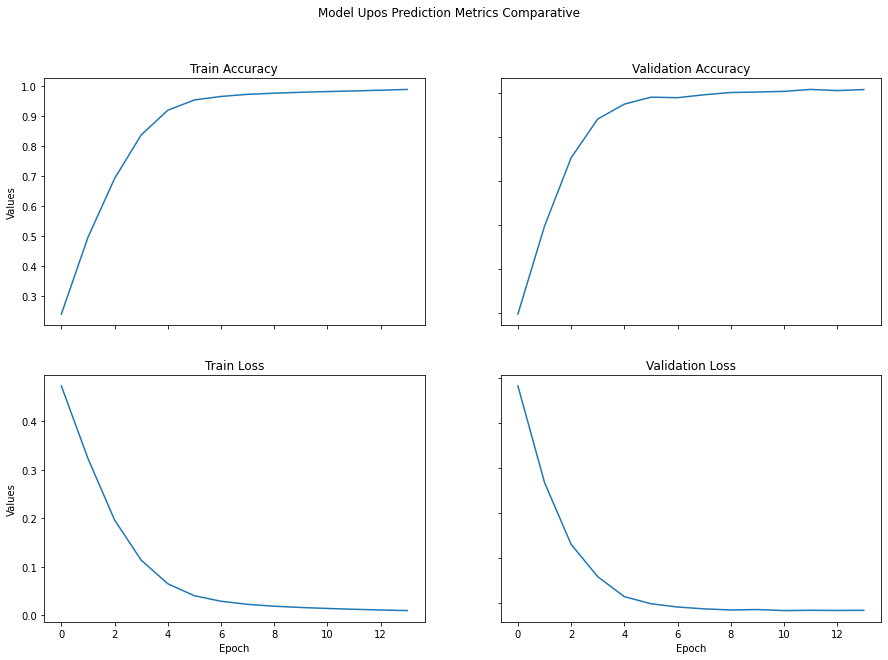

Model final accuracy:  0.9436619877815247


In [32]:
# Plot the P1 training, validation and print test metrics
if TRAIN_MODELS:
  plt.rcParams["figure.figsize"] = (15,10)

  # summarize history for train accuracy
  fig, axs = plt.subplots(2,2)
  fig.suptitle('Model Upos Prediction Metrics Comparative')
  axs[0,0].plot(history_advanced_pre.history['accuracy'])
  axs[0,0].set_title("Train Accuracy")
  # summarize history for validation accuracy
  axs[0,1].plot(history_advanced_pre.history['val_accuracy'])
  axs[0,1].set_title("Validation Accuracy")
  # summarize history for train loss
  axs[1,0].plot(history_advanced_pre.history['loss'])
  axs[1,0].set_title("Train Loss")
  # summarize history for validation loss
  axs[1,1].plot(history_advanced_pre.history['val_loss'])
  axs[1,1].set_title("Validation Loss")


  for ax in axs.flat:
      ax.set(xlabel='Epoch', ylabel='Values')

  # Hide x labels and tick labels for top plots and y ticks for right plots.
  for ax in axs.flat:
    ax.label_outer()

  plt.show()

  print("Model final accuracy: ", history_advanced_pre_test[1])

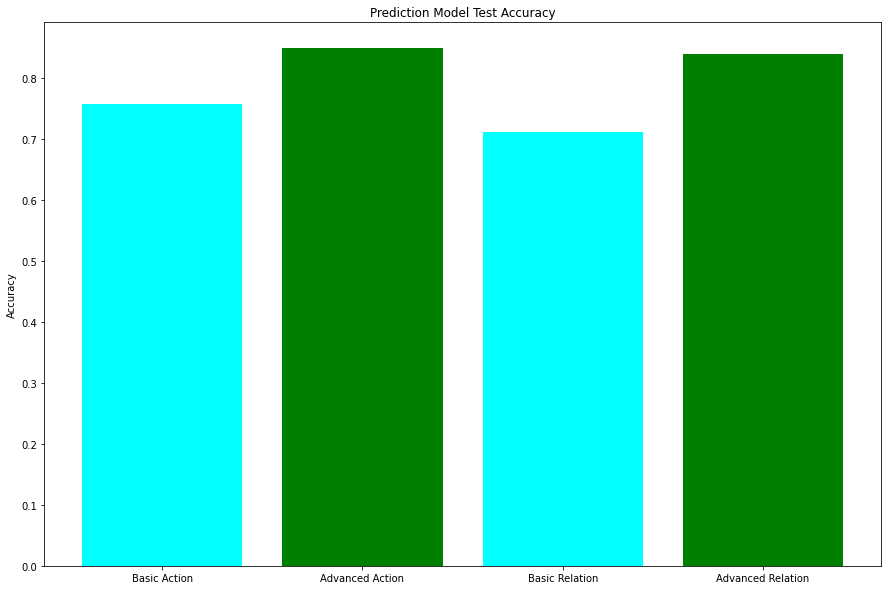

Final accuracy values
Action Basic model: 0.7571116089820862
Action Advance model: 0.8488590121269226
Relation Basic model: 0.7110034227371216
Relation Advance model: 0.8393247723579407


In [33]:
# Plot the test results for the basic and advance model
basic_action = history_basic_test[3]
basic_relation = history_basic_test[4]

advanced_action = history_advanced_test[3]
advanced_relation = history_advanced_test[4]

plt.bar(['Basic Action','Advanced Action','Basic Relation','Advanced Relation'],[basic_action, advanced_action, basic_relation,advanced_relation], color=['cyan', 'green', 'cyan', 'green'])
plt.title('Prediction Model Test Accuracy')
plt.ylabel('Accuracy')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

print("Final accuracy values")
print("Action Basic model:", basic_action)
print("Action Advance model:", advanced_action)
print("Relation Basic model:", basic_relation)
print("Relation Advance model:", advanced_relation)


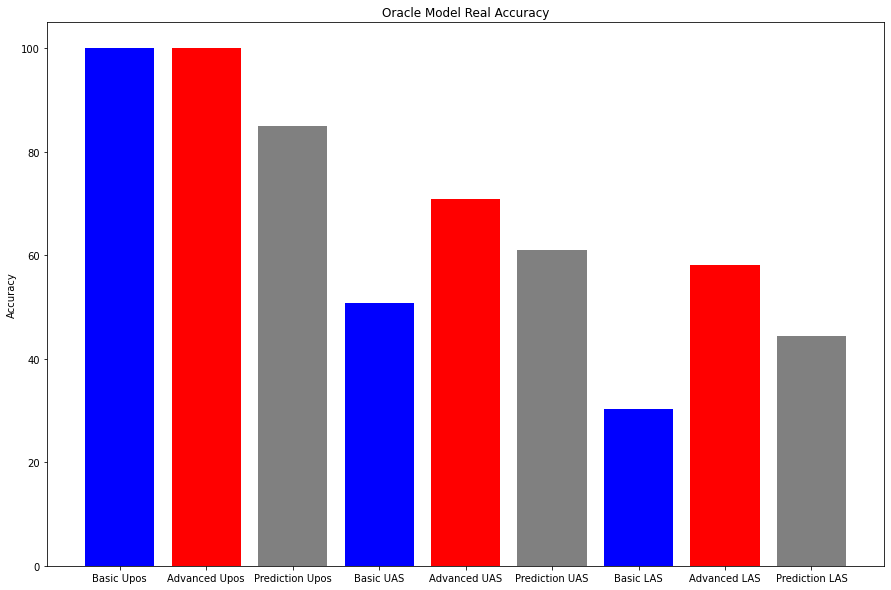

Final testing values
Upos values: [100.0, 100.0, 85.02]
UAS values (only heads): [50.73, 70.81, 61.09]
LAS values (heads and deprel): [30.35, 58.07, 44.32]


In [34]:
# Show the comparition between the files (real accuracy of the oracle prediction)

# Values are harcoded because they are generated in the execution of the external comparative program
# So they are copied from that results by hand

basic_upos = 100.00
basic_uas = 52.61
basic_las = 29.33

advanced_upos = 100.00
advanced_uas = 70.19
advanced_las = 57.24

advanced_pre_upos = 87.08
advanced_pre_uas = 59.92
advanced_pre_las = 43.96

plt.bar(['Basic Upos','Advanced Upos','Prediction Upos','Basic UAS','Advanced UAS','Prediction UAS','Basic LAS','Advanced LAS','Prediction LAS'],[basic_upos, advanced_upos, advanced_pre_upos, basic_uas,advanced_uas, advanced_pre_uas, basic_las,advanced_las, advanced_pre_las], color=['blue', 'red', 'grey', 'blue', 'red', 'grey', 'blue','red','gray'])
plt.title('Oracle Model Real Accuracy')
plt.ylabel('Accuracy')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

print("Final testing values")
print("Upos values:", [basic_upos, advanced_upos,advanced_pre_upos])
print("UAS values (only heads):",[basic_uas,advanced_uas,advanced_pre_uas])
print("LAS values (heads and deprel):",[basic_las,advanced_las,advanced_pre_las])
